In [ ]:
print("hello")



hello


## Import modules

In [4]:
from __future__ import division
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas
import timeit #more accurate than time

import theano
import tensorflow

from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential, model_from_json, load_model
from keras.optimizers import SGD
from keras.optimizers import Nadam
from keras.optimizers import Adam

from sklearn.utils import shuffle

import seaborn as sns
sns.set_style("white")
import os
import json

from six.moves import cPickle #Faster than pickle



In [5]:

Signal = pandas.read_csv("/content/drive/My Drive/Neutralinos/kinematic_variables.dat")

FullData = Signal
ranges = dict()
r = [[0,250], [0,3], [0,0.2], [0,0.3], [3, 3.4], [0,1000], [0,80], [0,3], [0,0.2], [0,80], [0,3], [0,0.3],[-2600, 2600], [-300, 300], [-500, 500], [0,6], [-2, 6], [0,1]]
for i, col in enumerate(FullData.columns):
    try:
        ranges[col] = r[i]
    except:
        ranges[col] = [0,10]
    
for i, col in enumerate(FullData.columns):
    plt.figure(i)


    x = Signal[col]
    #y = Background[col]

    ax = sns.distplot(x, hist_kws={"range": ranges[col]},bins=15, norm_hist = True, kde=False, label = "Signal")#, fit=stats.gamma);
    #ax = sns.distplot(y, hist_kws={"range": ranges[col]}, norm_hist = True, kde=False, label = "Background")#, fit=stats.gamma);
    ax.set_xlim(ranges[col][0], ranges[col][1])
    plt.legend()

    #plt.savefig('/home/guilherme/Desktop/SHiP/DATA_VACUUM/DP/Images/' + str(i) +'.jpg')



IOError: ignored

# Configure data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

TypeError: ignored

## Load Signal Samples

### Load an HNL signal with only 1 decay mode

#### HNL to Pi mu

In [1]:
#Loads the HNL to Pi mu samples with a training signal that has a similar dimension to the background sample
FullSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_HNL_decays.dat")
FullSignal[' Decay Mode'] = 1
TrainSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_short_HNL_decays.dat")
TrainSignal[' Decay Mode'] = 1

Signal = TrainSignal
Signal['target'] = 1.0

NameError: ignored

#### HNL to Mu mu nu

In [4]:
FullSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_HNL_decays.dat")
FullSignal[' Decay Mode'] = 5
TrainSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_short_HNL_decays.dat")
TrainSignal[' Decay Mode'] = 5

Signal = TrainSignal
Signal['target'] = 1.0

IOError: ignored

### Load the signal for the full HNL set

In [ ]:
Signal1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_HNL_decays.dat")
TrainSignal1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_short_HNL_decays.dat")
Signal1[' Decay Mode'] = 1
TrainSignal1[' Decay Mode'] = 1
Signal5 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_HNL_decays.dat")
TrainSignal5 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_short_HNL_decays.dat")
Signal5[' Decay Mode'] = 5
TrainSignal5[' Decay Mode'] = 5

FullSignal = pandas.concat([Signal1, Signal5], ignore_index=True)
Signal = pandas.concat([TrainSignal1, TrainSignal5], ignore_index=True)
Signal['target'] = 1.0

### Load the signal for the full HNL set when doing a multivariate study

In [ ]:
Signal1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_HNL_decays.dat")
TrainSignal1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Pimu/kinematic_variables_short_HNL_decays.dat")
Signal1[' Decay Mode'] = 1
TrainSignal1[' Decay Mode'] = 1
TrainSignal1['target1'] = 1.0
TrainSignal1['target5'] = 0.0
TrainSignal1['targetbackground'] = 0.0

Signal5 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_HNL_decays.dat")
TrainSignal5 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/HNL/Mumunu/kinematic_variables_short_HNL_decays.dat")
Signal5[' Decay Mode'] = 5
TrainSignal5[' Decay Mode'] = 5
TrainSignal5['target1'] = 0.0
TrainSignal5['target5'] = 1.0
TrainSignal5['targetbackground'] = 0.0

FullSignal = pandas.concat([Signal1, Signal5], ignore_index=True)
Signal = pandas.concat([TrainSignal1, TrainSignal5], ignore_index=True)

### Load the signal for individual Dark Photon decay modes

#### DP to Mu mu

In [ ]:
#Loads the DP to Mu mu samples with a training signal that has a similar dimension to the background sample
#The final analysis sample is still made of all the data we have on the decay mode
FullSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/DP/Mumu/kinematic_variables_DP_decays.dat")
FullSignal[' Decay Mode'] = 1
TrainSignal = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/DP/Mumu/kinematic_variables_short_DP_decays.dat")
TrainSignal[' Decay Mode'] = 1

Signal = TrainSignal
Signal['target'] = 1.0

## Load Background Samples

### Load the Background samples in Vacuum for the HNLs

In [2]:
nu_Background = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/nu_background/kinematic_variables_HNL_decays.dat")
MuDis_Background = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/muDIS_background/kinematic_variables_HNL_decays.dat")

Background = pandas.concat([nu_Background, MuDis_Background])

Background[' Decay Mode']= -1

print(len(nu_Background))
print(len(MuDis_Background))

NameError: ignored

### Load the Background samples in Vacuum for the DPs

In [ ]:
nu_Background = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/nu_background/kinematic_variables_DP_decays.dat")
MuDis_Background = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/muDIS_background/kinematic_variables_DP_decays.dat")

Background = pandas.concat([nu_Background, MuDis_Background])

Background[' Decay Mode']= -1

print(len(nu_Background))
print(len(MuDis_Background))

### Set the background targets

Background target for when we are doing a binary distinction

In [ ]:
Background['target'] = 0.0

Background target for the HNL multivariate analysis

In [ ]:
Background['target1'] = 0.0
Background['target5'] = 0.0
Background['targetbackground'] = 1.0


## Create development and validation samples

This defines lists of indices for signal and background events for the development and validation samples. About 30% of each class is reserved for validation

In [ ]:
# Creates a column that defines the target score that we want to achieve in each data set
sig_dev, sig_val = \
                train_test_split([i for i in Signal.index.tolist()],
                                 test_size=0.3, random_state=1337)

bg_dev, bg_val = \
                train_test_split([i for i in Background.index.tolist()],
                                 test_size=0.3, random_state=1337)


devData = Signal.loc[sig_dev].copy()
devData = devData.append(Background.loc[bg_dev].copy(), ignore_index = True)
valData = Signal.loc[sig_val].copy()
valData = valData.append(Background.loc[bg_val].copy(), ignore_index = True)

print(len(Signal), len(Background), len(devData), len(valData))

5016 4828 8372 3590


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### Feature sets

In [ ]:
#The columns in the file are separated by ", " so since this reads it as a .csv file the spaces count in the names. However I do not know where the target comes from
#Features = [var for var in Signal.columns if str.startswith(var, " Event") or str.startswith(var, " Decay Angle") or str.startswith(var, "target")] #introduzir todas as variáveis que pretendes excluir do treino
Features = [var for var in devData.columns if str.startswith(var, " Event") or str.startswith(var, " Decay Angle") or str.startswith(var, "target") or str.startswith(var, " Decay Mode") or str.startswith(var, " Decay X") or str.startswith(var, " Decay Y") or
            str.startswith(var, " Daughter1 Fraction") or str.startswith(var, " Daughter2 Fraction") or str.startswith(var, " Mother Transverse")] #introduzir todas as variáveis que pretendes excluir do treino
#trainFeatures = [var for var in DY_train.columns if var not in Features] #Reconstructed features; ok for training
trainFeatures = [var for var in devData.columns if var not in Features] #Reconstructed features; ok for training

print(trainFeatures)


[' Daughter1 Total Momentum (GeV/c)', ' Daughter1 Transverse Momentum (GeV/c)', ' Daughter2 Total Momentum (GeV/c)', ' Daughter2 Transverse Momentum (GeV/c)', ' Decay Z (cm)', ' Impact Parameter (cm)', ' Mother Fraction of Transverse Momentum', ' Opening Angle (rad)', 'Mother Total Momentum (GeV/c)']
9


### Training options

Training options for a binary separation

In [ ]:
classTrainFeatures = trainFeatures #The features used
classModel = "model0" #Will define the layout of the network
varSet = "trainFeatures" #Name of the feature set used, mainly for saving results
normIn = True #True #Whether we want to normalise and standardise the inputs
pca = True #True #Whether we want to use principal-component analysis to decorrelate inputs
whiten = True #True #Whether we want to whiten input data
nSplits = 1 #Number of train/test splits to make during cross-validation
ensembleSize = 1 #Number of classifiers  to include in ensemble = min(nSplits, ensembleSize)
ensembleMode = 'loss'#accuracy'#'loss' #Metric used to weight classifiers in ensemble
#nad=Nadam(0.0001, 0.9, 0.999, 1e-08, 0.004)
nad=Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#sgd=SGD(0.001,0.0,0.0,False)
sgd=SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
#categorical_cross_entropy para várias amostras de sinal
compileArgs = {'loss':'binary_crossentropy', 
               'optimizer':'Adam'}#, 'metrics':['acc']} #Loss function and optimiser for NN
trainParams = {'epochs' : 500, 
               'batch_size' : 100, 
               'verbose' : 2} #Maximum epochs for training and size of mini-batch
print("Training on {} features {}". format(len(classTrainFeatures),[var for var in classTrainFeatures]))

Training on 9 features [' Daughter1 Total Momentum (GeV/c)', ' Daughter1 Transverse Momentum (GeV/c)', ' Daughter2 Total Momentum (GeV/c)', ' Daughter2 Transverse Momentum (GeV/c)', ' Decay Z (cm)', ' Impact Parameter (cm)', ' Mother Fraction of Transverse Momentum', ' Opening Angle (rad)', 'Mother Total Momentum (GeV/c)']


Training options for multivariate analysis

In [ ]:
classTrainFeatures = trainFeatures #The features used
classModel = "model0" #Will define the layout of the network
varSet = "trainFeatures" #Name of the feature set used, mainly for saving results
normIn = True #True #Whether we want to normalise and standardise the inputs
pca = True #True #Whether we want to use principal-component analysis to decorrelate inputs
whiten = True #True #Whether we want to whiten input data
nSplits = 1 #Number of train/test splits to make during cross-validation
ensembleSize = 1 #Number of classifiers  to include in ensemble = min(nSplits, ensembleSize)
ensembleMode = 'loss'#accuracy'#'loss' #Metric used to weight classifiers in ensemble
#nad=Nadam(0.0001, 0.9, 0.999, 1e-08, 0.004)
nad=Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#sgd=SGD(0.001,0.0,0.0,False)
#sgd=SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
#categorical_cross_entropy
compileArgs = {'loss':'categorical_crossentropy', 
               'optimizer':'sgd'}#, 'metrics':['acc']} #Loss function and optimiser for NN
trainParams = {'epochs' : 5000, 
               'batch_size' : 200, 
               'verbose' : 2} #Maximum epochs for training and size of mini-batch
print("Training on {} features {}". format(len(classTrainFeatures),[var for var in classTrainFeatures]))

## Pre-process data

Here we define a SK-Learn pipeline which will contain transformation steps for any data fed in. Pipelines are a nice, compact way of handing data transformations.

In [ ]:
stepsIn = []
if not normIn and not pca:
    stepsIn.append(('ident', StandardScaler(with_mean=False, with_std=False))) #For compatability
else:
    if normIn:
        stepsIn.append(('normIn', StandardScaler()))
    if pca:
        stepsIn.append(('pca', PCA(whiten=whiten)))
inputPipe = Pipeline(stepsIn)
stepsOut = []
print(stepsIn)

[('normIn', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True))]


In [ ]:
#Features1 = [var for var in DY_train.columns if str.startswith(var, "target") or str.startswith(var, "Jpsi_target")]
Features1 = [var for var in devData.columns if str.startswith(var, "target")]

print(Features1)
# X_class -> N vectors of size 9
X_class_train = inputPipe.fit_transform(devData[classTrainFeatures].values.astype('float32'))

# y_class -> N vectors of size 1
y_class_train = devData[Features1].values.astype('float32')

X_class_val = inputPipe.transform(valData[classTrainFeatures].values.astype('float32'))
y_class_val = valData[Features1].values.astype('float32') 

print(len(X_class_train))
print("  --  >>  <<  --")
print(len(X_class_val[0]))



['target']
8372
  --  >>  <<  --
9


## Define classifier

Classifier for the binary separation

In [ ]:

def getClassifier(model, nIn, compileArgs):
    classModel = Sequential()
    depth = None
    width = None
    if model == "model0":
        depth = 3
        width = 25
        step = 5
    #classModel.add(Dropout(0.2))
    classModel.add(Dense(width, input_shape=(9,), kernel_initializer='normal', activation='relu'))#, kernel_initializer='TruncatedNormal')) #First layer requires number of inputs
    classModel.add(Activation('relu')) #Add ReLU activation function
    for i in range(depth): #Continue to add hidden layers 
        width = width-step
        print(width)
        classModel.add(Dropout(0.05))
        classModel.add(Dense(width, kernel_initializer='normal', activation='relu'))#kernel_initializer='TruncatedNormal') #Subsequent layers inherit input_dim from previous layer
        #classModel.add(Activation('relu'))
    #classModel.add(Dropout(0.2))
    classModel.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))#, kernel_initializer='TruncatedNormal')) #Final layer requires one output
    #Change this to put a number of neurons equal to the number of categories and change sigmoid to softmax
    classModel.compile(**compileArgs) #Compile the network graph to prepare it for use
    return classModel

Classifier for a multivariate separation

In [ ]:
def getClassifier(model, nIn, compileArgs):
    classModel = Sequential()
    depth = None
    width = None
    if model == "model0":
        depth = 2
        width = 30
        step = 10
    #classModel.add(Dropout(0.2))
    classModel.add(Dense(width, input_shape=(9,), kernel_initializer='normal', activation='relu'))#, kernel_initializer='TruncatedNormal')) #First layer requires number of inputs
    classModel.add(Activation('relu')) #Add ReLU activation function
    for i in range(depth): #Continue to add hidden layers 
        width = width-step
        print(width)
        #classModel.add(Dropout(0.20))
        classModel.add(Dense(width, kernel_initializer='normal', activation='relu'))#kernel_initializer='TruncatedNormal') #Subsequent layers inherit input_dim from previous layer
        #classModel.add(Activation('relu'))
    #classModel.add(Dropout(0.2))
    classModel.add(Dense(3, kernel_initializer='normal', activation='softmax'))#, kernel_initializer='TruncatedNormal')) #Final layer requires one output
    #Change this to put a number of neurons equal to the number of categories and change sigmoid to softmax
    classModel.compile(**compileArgs) #Compile the network graph to prepare it for use
    return classModel

### Callbacks

Callbacks are methods that can be called during training. They have a variety of uses such as monitoring training, stopping training early, and saving different versions of the model. Here we define our own callback,  which saves the history of the training.

We want to view the history of the model's performance on the training and testing data during data, however by default the training loss is averaged over the epoch, and the test loss is evaluated at the end of the epoch, so is not comparable. This modified version evaluates the performance on the training data at the end of each epoch.

Later well also use some other callbacks:

EarlyStopping monitors a specified metric and stops the training if the performance fails to improve for a specified number of epochs in a row. Here we use it to monitor the loss on the test data and stop when it doesn't improve after 10 epochs.

ModelCheckpoint is used to save the weights of the network during training. It's quite flexible, but here we use it save the model which performs best according to the loss in test data.

Normally during training, the test loss will reach a minimum and either saturate or start to increase (overtraining). The training loss will normally either saturate or continue to decrease. The optimum point is when the test-loss first reaches its minimum point. The combination of EarlyStopping and ModelCheckpoint acts to save the model at this point and allow some leeway in case it starts to decrease again.

In [ ]:
class LossHistory(Callback):
    def __init__(self, trData):
        self.trainingData = trData
    def on_train_begin(self, logs={}):
        self.losses = {}
        self.losses['loss'] = []
        self.losses['val_loss'] = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses['loss'].append(self.model.evaluate(self.trainingData[0], self.trainingData[1], verbose=0))
        self.losses['val_loss'].append(logs.get('val_loss'))
    

In [ ]:
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True
    

## Train classifier

In [ ]:

#W_final = np.array(W)

start = timeit.default_timer()

results = []
histories = []

os.chdir('/home/guilherme/Desktop/SHiP/Train Classifier Folder/VACUUM/DPEe1/')

os.system("mkdir train_weights")
os.system("rm train_weights/*.h5")
os.system("rm train_weights/*.json")
os.system("rm train_weights/*.pkl")

model = None # Clearing the NN
model = getClassifier(classModel, len(classTrainFeatures), compileArgs)
#model.reset_states #Just checking
    
lossHistory = LossHistory((X_class_train, y_class_train))
earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
saveBest = ModelCheckpoint("train_weights/best.h5", monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=True, mode='auto', period=1)
    
#Begin training the model
C = model.fit(X_class_train, y_class_train, validation_data = (X_class_val, y_class_val), callbacks = [earlyStop, saveBest, lossHistory], **trainParams)
    
histories.append(lossHistory.losses) #Saves the loss history from callback
model.load_weights("train_weights/best.h5") #Loads the best model saved by ModelCheckpoint
       
results.append({})

results[-1]['loss'] = model.evaluate(X_class_val, y_class_val, verbose=0) #Gets loss on test data
#results[-1]['AUC'] = 1-roc_auc_score(y_class_val, model.predict(X_class_val, verbose=0)) #Gets ROC AUC for test data
 
#print("Score is:", results[-1])
    
model.save('train_weights/train.h5') #Save the model

with open('train_weights/resultsFile.pkl', 'wb') as fout: #Save results
    cPickle.dump(results, fout)

print("Cross-validation took {:.3f}s ".format(timeit.default_timer() - start))

model.summary() #Prints a summary of the model layout
model = None



## Construct ensemble
During the *k*-fold CV we trained *k* models. We could just use the best one, however it is unlikely to optimimum for all input possibilities. Ensembling is a method of using multiple classifiers together to achieve a better result than a single one on its own.

The method I use here is to weight the contributions of each classifier according to how well it performed on its test set during CV.

In [ ]:
plt.figure(figsize=(16,8))
#print(model.predict(X_class))
for i, history in enumerate(histories):
    if i == 0:
        plt.plot(history['loss'], color='g', label='Training')
        plt.plot(history['val_loss'], color='b', label='Testing')
    else:
        plt.plot(history['loss'], color='g')
        plt.plot(history['val_loss'], color='b')
        
plt.legend(fontsize=16)
plt.xlabel("Epoch", fontsize=24, color='black')
plt.ylabel("Loss", fontsize=24, color='black')
plt.yscale('log',nonposy='clip')
plt.show()

In [ ]:


os.chdir('/home/guilherme/Desktop/SHiP/Train Classifier Folder/VACUUM/DPEe1')
results = None
with open('train_weights/resultsFile.pkl', 'rb') as fin: #Reload results in case notebook was closed
    results = cPickle.load(fin)

In [ ]:
model = load_model('/home/guilherme/Desktop/SHiP/Train Classifier Folder/VACUUM/DPEe1/train_weights/train.h5')

## Response on dev and val data

In [ ]:
pred_train = model.predict(X_class_train, verbose=0)
pred_val = model.predict(X_class_val, verbose=0)

devAUC = roc_auc_score(y_class_train[:,0], pred_train[:,0])
print('Area under ROC curve for development data is {:.5f}'.format(devAUC))

valAUC = roc_auc_score(y_class_val[:,0], pred_val[:,0])
print('Area under ROC curve for validation data is {:.5f}'.format(valAUC))


#devAUC = roc_auc_score(y_class_train[:,0], pred_train[:,1])
#print('Area under ROC curve for development data is {:.5f}'.format(devAUC))

#valAUC = roc_auc_score(y_class_val[:,0], pred_val[:,1])
#print('Area under ROC curve for validation data is {:.5f}'.format(valAUC))


#devAUC = roc_auc_score(y_class_train[:,0], pred_train[:,2])
#print('Area under ROC curve for development data is {:.5f}'.format(devAUC))

#valAUC = roc_auc_score(y_class_val[:,0], pred_val[:,2])
#print('Area under ROC curve for validation data is {:.5f}'.format(valAUC))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()

precision, recall, _ = precision_recall_curve(y_class_val[:, i], pred_val[:, i])
average_precision = average_precision_score(y_class_val[:, i], pred_val[:, i])

#print('Precision score: {0:0.2f}'.format(average_precision["micro"]))

In [ ]:
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Efficiency')
plt.ylabel('Purity')
plt.ylim([0.95, 1.01])
plt.xlim([0.0, 1.05])
plt.title(
    'Average precision score')

## Aplying the NN to the data set in order to obtain the probabilities of being signal 

### This is for binary selection only

In [ ]:
Signal_final = inputPipe.transform(FullSignal[classTrainFeatures].values.astype('float32'))
Signal_pred = model.predict(Signal_final, verbose=0)
FullSignal['signal_probability'] = pandas.Series(Signal_pred[:,0], index=FullSignal.index)
Background_final = inputPipe.transform(Background[classTrainFeatures].values.astype('float32'))
Background_pred = model.predict(Background_final, verbose=0)
Background['signal_probability'] = pandas.Series(Background_pred[:,0], index=Background.index)

#Automatic plots of all the variables of the signal
#fig = plt.figure(figsize = (20,20))
#ax = fig.gca()
#Signal.hist(ax=ax)
#plt.show()

In [ ]:
ax = FullSignal.hist(column='signal_probability', by=' Decay Mode', bins=100, grid=False, figsize=(8,16), layout=(6,1), sharex=True, color='#86bf91', zorder=2, rwidth=1.0, log=False)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Probability attributed", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Events for each Decay Mode", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:

ax = Background.hist(column='signal_probability', by=' Event type', bins=50, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='#86bf91', zorder=2, rwidth=1.0, log=True)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Probability attributed", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Events for each Background Type", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:
print(FullSignal['signal_probability'].max())
print(Background['signal_probability'].max())

Max = Background['signal_probability'].max()
Threshold = Max

SurvivingSignal=FullSignal[FullSignal["signal_probability"] > Threshold]
SurvivingBackground=Background[Background["signal_probability"] > Threshold]

print("There are " + str(len(SurvivingSignal)) + " true  positives and " + str(len(SurvivingBackground)) + " false positives.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal)/len(FullSignal)))

#for n in range (0,1000):
#    Threshold=1-n*0.001
#    SurvivingSignal=FullSignal[FullSignal["signal_probability"]>Threshold]
#    if len(SurvivingSignal)/len(FullSignal)>0.4097:
#        break
        
#print("The threshold to keep the selection efficiency of the signal comparable to Vacuum is " + str(Threshold))

#SurvivingSignal=FullSignal[FullSignal["signal_probability"] > Threshold]
#SurvivingBackground=Background[Background["signal_probability"] > Threshold]

#print("There are " + str(len(SurvivingSignal)) + " true  positives and " + str(len(SurvivingBackground)) + " false positives.")
#print("This leads to a total selection efficiency of " + str(len(SurvivingSignal)/len(FullSignal)))
#print("There is, however, a background selection efficiency of " + str(len(SurvivingBackground)/len(Background)*100) + " %")

### This is for the multivariate analysis

In [ ]:
Signal_final = inputPipe.transform(FullSignal[classTrainFeatures].values.astype('float32'))
Signal_pred = model.predict(Signal_final, verbose=0)
FullSignal['signal_probability0'] = pandas.Series(Signal_pred[:,0], index=FullSignal.index)
FullSignal['signal_probability1'] = pandas.Series(Signal_pred[:,1], index=FullSignal.index)
FullSignal['signal_probability2'] = pandas.Series(Signal_pred[:,2], index=FullSignal.index)
FullSignal['signal_probability3'] = pandas.Series(Signal_pred[:,3], index=FullSignal.index)
FullSignal['signal_probability4'] = pandas.Series(Signal_pred[:,4], index=FullSignal.index)
FullSignal['signal_probability5'] = pandas.Series(Signal_pred[:,5], index=FullSignal.index)
FullSignal['signal_probability_bg'] = pandas.Series(Signal_pred[:,6], index=FullSignal.index)
Background_final = inputPipe.transform(Background[classTrainFeatures].values.astype('float32'))
Background_pred = model.predict(Background_final, verbose=0)
Background['signal_probability0'] = pandas.Series(Background_pred[:,0], index=Background.index)
Background['signal_probability1'] = pandas.Series(Background_pred[:,1], index=Background.index)
Background['signal_probability2'] = pandas.Series(Background_pred[:,2], index=Background.index)
Background['signal_probability3'] = pandas.Series(Background_pred[:,3], index=Background.index)
Background['signal_probability4'] = pandas.Series(Background_pred[:,4], index=Background.index)
Background['signal_probability5'] = pandas.Series(Background_pred[:,5], index=Background.index)
Background['signal_probability_bg'] = pandas.Series(Background_pred[:,6], index=Background.index)

#Automatic plots of all the variables of the signal
#fig = plt.figure(figsize = (20,20))
#ax = fig.gca()
#Signal.hist(ax=ax)
#plt.show()

In [ ]:
ax = FullSignal.hist(column='signal_probability0', by=' Decay Mode', bins=100, grid=False, figsize=(8,16), layout=(6,1), sharex=True, color='#86bf91', zorder=2, rwidth=1.0, log=False)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Probability attributed", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Events for each Decay Mode", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:
ax = Background.hist(column='signal_probability0', by=' Event type', bins=50, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='#86bf91', zorder=2, rwidth=1.0, log=True)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Probability attributed", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Events for each Background Type", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:
print(Background['signal_probability0'].max())
print(Background['signal_probability1'].max())
print(Background['signal_probability2'].max())
print(Background['signal_probability3'].max())
print(Background['signal_probability4'].max())
print(Background['signal_probability5'].max())

Max0 = Background['signal_probability0'].max()
Max1 = Background['signal_probability1'].max()
Max2 = Background['signal_probability2'].max()
Max3 = Background['signal_probability3'].max()
Max4 = Background['signal_probability4'].max()
Max5 = Background['signal_probability5'].max()

SurvivingSignal0=FullSignal[(FullSignal["signal_probability0"] > Max0) & (FullSignal[" Decay Mode"] == 0)]
SurvivingBackground0=Background[Background["signal_probability0"] > Max0]
SurvivingSignal1=FullSignal[(FullSignal["signal_probability1"] > Max1) & (FullSignal[" Decay Mode"] == 1)]
SurvivingBackground1=Background[Background["signal_probability1"] > Max1]
SurvivingSignal2=FullSignal[(FullSignal["signal_probability2"] > Max2) & (FullSignal[" Decay Mode"] == 2)]
SurvivingBackground2=Background[Background["signal_probability2"] > Max2]
SurvivingSignal3=FullSignal[(FullSignal["signal_probability3"] > Max3) & (FullSignal[" Decay Mode"] == 3)]
SurvivingBackground3=Background[Background["signal_probability3"] > Max3]
SurvivingSignal4=FullSignal[(FullSignal["signal_probability4"] > Max4) & (FullSignal[" Decay Mode"] == 4)]
SurvivingBackground4=Background[Background["signal_probability4"] > Max4]
SurvivingSignal5=FullSignal[(FullSignal["signal_probability5"] > Max5) & (FullSignal[" Decay Mode"] == 5)]
SurvivingBackground5=Background[Background["signal_probability5"] > Max5]

print("There are " + str(len(SurvivingSignal0)) + " true  positives and " + str(len(SurvivingBackground0)) + " negatives for the decay into Pi e.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal0)/len(Signal0)))

print("There are " + str(len(SurvivingSignal1)) + " true  positives and " + str(len(SurvivingBackground1)) + " negatives for the decay into Pi mu.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal1)/len(Signal1)))

print("There are " + str(len(SurvivingSignal2)) + " true  positives and " + str(len(SurvivingBackground2)) + " negatives for the decay into Rho e.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal2)/len(Signal2)))

print("There are " + str(len(SurvivingSignal3)) + " true  positives and " + str(len(SurvivingBackground3)) + " negatives for the decay into Rho mu.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal3)/len(Signal3)))

print("There are " + str(len(SurvivingSignal4)) + " true  positives and " + str(len(SurvivingBackground4)) + " negatives for the decay into Rho0 nu.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal4)/len(Signal4)))

print("There are " + str(len(SurvivingSignal5)) + " true  positives and " + str(len(SurvivingBackground5)) + " negatives for the decay into Mu mu nu.")
print("This leads to a total selection efficiency of " + str(len(SurvivingSignal5)/len(Signal5)))     

In [ ]:
MissId01=FullSignal[(FullSignal['signal_probability1'] > Max1) & (FullSignal[" Decay Mode"] == 0)]
MissId02=FullSignal[(FullSignal['signal_probability2'] > Max2) & (FullSignal[" Decay Mode"] == 0)]
MissId03=FullSignal[(FullSignal['signal_probability3'] > Max3) & (FullSignal[" Decay Mode"] == 0)]
MissId04=FullSignal[(FullSignal['signal_probability4'] > Max4) & (FullSignal[" Decay Mode"] == 0)]
MissId05=FullSignal[(FullSignal['signal_probability5'] > Max5) & (FullSignal[" Decay Mode"] == 0)]
MissId0=pandas.concat([MissId01, MissId02, MissId03, MissId04, MissId05])
MissId0.drop_duplicates()
FinalSignal0=pandas.concat([SurvivingSignal0, MissId0]).drop_duplicates()
print("There were " + str(len(MissId0)) + " events that decay to Pi e selected as different decay modes, from which " + str(len(MissId0)-len(FinalSignal0)+len(SurvivingSignal0)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal0)/len(Signal0)))

MissId10=FullSignal[(FullSignal['signal_probability0'] > Max0) & (FullSignal[" Decay Mode"] == 1)]
MissId12=FullSignal[(FullSignal['signal_probability2'] > Max2) & (FullSignal[" Decay Mode"] == 1)]
MissId13=FullSignal[(FullSignal['signal_probability3'] > Max3) & (FullSignal[" Decay Mode"] == 1)]
MissId14=FullSignal[(FullSignal['signal_probability4'] > Max4) & (FullSignal[" Decay Mode"] == 1)]
MissId15=FullSignal[(FullSignal['signal_probability5'] > Max5) & (FullSignal[" Decay Mode"] == 1)]
MissId1=pandas.concat([MissId10, MissId12, MissId13, MissId14, MissId15])
MissId1.drop_duplicates()
FinalSignal1=pandas.concat([SurvivingSignal1, MissId1]).drop_duplicates()
print("There were " + str(len(MissId1)) + " events that decay to Pi mu selected as different decay modes, from which " + str(len(MissId1)-len(FinalSignal1)+len(SurvivingSignal1)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal1)/len(Signal1)))

MissId20=FullSignal[(FullSignal['signal_probability0'] > Max0) & (FullSignal[" Decay Mode"] == 2)]
MissId21=FullSignal[(FullSignal['signal_probability1'] > Max1) & (FullSignal[" Decay Mode"] == 2)]
MissId23=FullSignal[(FullSignal['signal_probability3'] > Max3) & (FullSignal[" Decay Mode"] == 2)]
MissId24=FullSignal[(FullSignal['signal_probability4'] > Max4) & (FullSignal[" Decay Mode"] == 2)]
MissId25=FullSignal[(FullSignal['signal_probability5'] > Max5) & (FullSignal[" Decay Mode"] == 2)]
MissId2=pandas.concat([MissId20, MissId21, MissId23, MissId24, MissId25])
MissId2.drop_duplicates()
FinalSignal2=pandas.concat([SurvivingSignal2, MissId2]).drop_duplicates()
print("There were " + str(len(MissId2)) + " events that decay to Rho e selected as different decay modes, from which " + str(len(MissId2)-len(FinalSignal2)+len(SurvivingSignal2)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal2)/len(Signal2)))

MissId30=FullSignal[(FullSignal['signal_probability0'] > Max0) & (FullSignal[" Decay Mode"] == 3)]
MissId31=FullSignal[(FullSignal['signal_probability1'] > Max1) & (FullSignal[" Decay Mode"] == 3)]
MissId32=FullSignal[(FullSignal['signal_probability2'] > Max2) & (FullSignal[" Decay Mode"] == 3)]
MissId34=FullSignal[(FullSignal['signal_probability4'] > Max4) & (FullSignal[" Decay Mode"] == 3)]
MissId35=FullSignal[(FullSignal['signal_probability5'] > Max5) & (FullSignal[" Decay Mode"] == 3)]
MissId3=pandas.concat([MissId30, MissId31, MissId32, MissId34, MissId35])
MissId3.drop_duplicates()
FinalSignal3=pandas.concat([SurvivingSignal3, MissId3]).drop_duplicates()
print("There were " + str(len(MissId3)) + " events that decay to Rho mu selected as different decay modes, from which " + str(len(MissId3)-len(FinalSignal3)+len(SurvivingSignal3)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal3)/len(Signal3)))

MissId40=FullSignal[(FullSignal['signal_probability0'] > Max0) & (FullSignal[" Decay Mode"] == 4)]
MissId41=FullSignal[(FullSignal['signal_probability1'] > Max1) & (FullSignal[" Decay Mode"] == 4)]
MissId42=FullSignal[(FullSignal['signal_probability2'] > Max2) & (FullSignal[" Decay Mode"] == 4)]
MissId43=FullSignal[(FullSignal['signal_probability3'] > Max3) & (FullSignal[" Decay Mode"] == 4)]
MissId45=FullSignal[(FullSignal['signal_probability5'] > Max5) & (FullSignal[" Decay Mode"] == 4)]
MissId4=pandas.concat([MissId40, MissId41, MissId42, MissId43, MissId45])
MissId4.drop_duplicates()
FinalSignal4=pandas.concat([SurvivingSignal4, MissId4]).drop_duplicates()
print("There were " + str(len(MissId4)) + " events that decay to Rho0 nu selected as different decay modes, from which " + str(len(MissId4)-len(FinalSignal4)+len(SurvivingSignal4)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal4)/len(Signal4)))

MissId50=FullSignal[(FullSignal['signal_probability0'] > Max0) & (FullSignal[" Decay Mode"] == 5)]
MissId51=FullSignal[(FullSignal['signal_probability1'] > Max1) & (FullSignal[" Decay Mode"] == 5)]
MissId52=FullSignal[(FullSignal['signal_probability2'] > Max2) & (FullSignal[" Decay Mode"] == 5)]
MissId53=FullSignal[(FullSignal['signal_probability3'] > Max3) & (FullSignal[" Decay Mode"] == 5)]
MissId54=FullSignal[(FullSignal['signal_probability4'] > Max4) & (FullSignal[" Decay Mode"] == 5)]
MissId5=pandas.concat([MissId50, MissId51, MissId52, MissId53, MissId54])
MissId5.drop_duplicates()
FinalSignal5=pandas.concat([SurvivingSignal5, MissId5]).drop_duplicates()
print("There were " + str(len(MissId5)) + " events that decay to Mu mu nu selected as different decay modes, from which " + str(len(MissId5)-len(FinalSignal5)+len(SurvivingSignal5)) + " were duplicates.")
print("This leads to a total selection efficiency of " + str(len(FinalSignal5)/len(Signal5)))


# Standard Analysis on Vacuum

## Heavy Neutral Leptons

### Kinematic Cuts

In [ ]:
Impact_par_cut = 33.
Lin_mom_cut = 1.
Imp_vs_Op_ang_cut = 0.04/28
Imp_vs_TLM_doublecut1 = [10.,38.]
Imp_vs_TLM_doublecut2 = [6.,58.]
Imp_vs_TM_low_cut = [12.,0.25]
Imp_vs_TM_high_cut = [16.,1.45]
Imp_vs_TM_par_cut = [0.05,7.3/0.1331**2,2.]
Imp_vs_TTLM_par_cut = [0.0005,2.7675/0.00767**2,2.]
Z_low_cut = -2446.3

### Signal Analysis

In [ ]:
SignalCut1 = FullSignal[FullSignal[' Impact Parameter (cm)'] <= Impact_par_cut]
SignalCut2 = SignalCut1[(SignalCut1[' Daughter1 Total Momentum (GeV/c)'] >= Lin_mom_cut) & (SignalCut1[' Daughter2 Total Momentum (GeV/c)'] >= Lin_mom_cut)]
SignalCut3 = SignalCut2[SignalCut2[' Impact Parameter (cm)']/SignalCut2[' Opening Angle (rad)'] >= Imp_vs_Op_ang_cut]

#Apply the Impact Parameter vs Mother's Total Momentum cuts
drop_entries = []
for impact, momentum, entry in zip(SignalCut3[" Impact Parameter (cm)"],SignalCut3["Mother Total Momentum (GeV/c)"],SignalCut3.index):
    if (impact > Imp_vs_TLM_doublecut1[0] and momentum > Imp_vs_TLM_doublecut1[1]) or (impact > Imp_vs_TLM_doublecut2[0] and momentum > Imp_vs_TLM_doublecut2[1]):
        drop_entries.append(entry)        
SignalCut4 = SignalCut3.drop(drop_entries)

#Apply the Impact Parameter vs Daughter's Transverse Momentum cuts
drop_entries = []
for impact, momentum1, momentum2, entry in zip(SignalCut4[' Impact Parameter (cm)'],SignalCut4[' Daughter1 Transverse Momentum (GeV/c)'],SignalCut4[' Daughter2 Transverse Momentum (GeV/c)'],SignalCut4.index):
    if impact > Imp_vs_TM_low_cut[0] and (momentum1 < Imp_vs_TM_low_cut[1] or momentum2 < Imp_vs_TM_low_cut[1]):
        drop_entries.append(entry)
    if impact > Imp_vs_TM_high_cut[0] and (momentum1 > Imp_vs_TM_high_cut[1] or momentum2 > Imp_vs_TM_high_cut[1]):
        drop_entries.append(entry)
SignalCut5 = SignalCut4.drop(drop_entries)
SignalCut6 = SignalCut5[(SignalCut5[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-SignalCut5[' Daughter1 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2]) &
                        (SignalCut5[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-SignalCut5[' Daughter2 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2])]
SignalCut7 = SignalCut6[SignalCut6[' Impact Parameter (cm)'] <= Imp_vs_TTLM_par_cut[1]*(Imp_vs_TTLM_par_cut[0]-SignalCut6[' Mother Fraction of Transverse Momentum'])**2 + Imp_vs_TTLM_par_cut[2]]
SignalCut8 = SignalCut7[SignalCut7[' Decay Z (cm)'] >= Z_low_cut]

print("There are " + str(len(FullSignal)) + " signal events.")
print("Selection eficiency after the 1st cut: " + str(len(SignalCut1)/len(FullSignal)))
print("Selection eficiency after the 2nd cut: " + str(len(SignalCut2)/len(FullSignal)))
print("Selection eficiency after the 3rd cut: " + str(len(SignalCut3)/len(FullSignal)))
print("Selection eficiency after the 4th cut: " + str(len(SignalCut4)/len(FullSignal)))
print("Selection eficiency after the 5th cut: " + str(len(SignalCut5)/len(FullSignal)))
print("Selection eficiency after the 6th cut: " + str(len(SignalCut6)/len(FullSignal)))
print("Selection eficiency after the 7th cut: " + str(len(SignalCut7)/len(FullSignal)))
print("Selection eficiency after the final cut: " + str(len(SignalCut8)/len(FullSignal)))
print("There are " + str(len(SignalCut8)) + " events that survive the cuts.")

There are 143742 signal events.
Selection eficiency after the 1st cut: 0.6301150672733091
Selection eficiency after the 2nd cut: 0.6223372431161386
Selection eficiency after the 3rd cut: 0.6223372431161386
Selection eficiency after the 4th cut: 0.5302486399243088
Selection eficiency after the 5th cut: 0.5094822668391981
Selection eficiency after the 6th cut: 0.4831503666290994
Selection eficiency after the 7th cut: 0.45008417859776545
Selection eficiency after the final cut: 0.44895020244604916
There are 64533 events that survive the cuts.


Breakdown by decay mode for the full HNL signal

In [ ]:
SignalCutDecay1=SignalCut8[SignalCut8[" Decay Mode"] == 1]
SignalCutDecay5=SignalCut8[SignalCut8[" Decay Mode"] == 5]

print("HNL to Pi mu efficiency : " + str(len(SignalCutDecay1)/len(Signal1)))
print("HNL to Mu mu nu efficiency : " + str(len(SignalCutDecay5)/len(Signal5)))

HNL to Pi e efficiency : 0.848168627614019
HNL to Pi mu efficiency : 0.9172901391590603
HNL to Rho e efficiency : 0.3895342963935751
HNL to Rho mu efficiency : 0.41233526162411377
HNL to Rho0 nu efficiency : 0.06584847769648336
HNL to Mu mu nu efficiency : 0.035331056136355794


### Background Analysis

In [ ]:
BackgroundCut1 = Background[Background[' Impact Parameter (cm)'] <= Impact_par_cut]
BackgroundCut2 = BackgroundCut1[(BackgroundCut1[' Daughter1 Total Momentum (GeV/c)'] >= Lin_mom_cut) & (BackgroundCut1[' Daughter2 Total Momentum (GeV/c)'] >= Lin_mom_cut)]
BackgroundCut3 = BackgroundCut2[BackgroundCut2[' Impact Parameter (cm)']/BackgroundCut2[' Opening Angle (rad)'] >= Imp_vs_Op_ang_cut]

#Apply the Impact Parameter vs Mother's Total Momentum cuts
drop_entries = []
for impact, momentum, entry in zip(BackgroundCut3[" Impact Parameter (cm)"],BackgroundCut3["Mother Total Momentum (GeV/c)"],BackgroundCut3.index):
    if (impact > Imp_vs_TLM_doublecut1[0] and momentum > Imp_vs_TLM_doublecut1[1]) or (impact > Imp_vs_TLM_doublecut2[0] and momentum > Imp_vs_TLM_doublecut2[1]):
        drop_entries.append(entry)        
BackgroundCut4 = BackgroundCut3.drop(drop_entries)

#Apply the Impact Parameter vs Daughter's Transverse Momentum cuts
drop_entries = []
for impact, momentum1, momentum2, entry in zip(BackgroundCut4[' Impact Parameter (cm)'],BackgroundCut4[' Daughter1 Transverse Momentum (GeV/c)'],BackgroundCut4[' Daughter2 Transverse Momentum (GeV/c)'],BackgroundCut4.index):
    if impact > Imp_vs_TM_low_cut[0] and (momentum1 < Imp_vs_TM_low_cut[1] or momentum2 < Imp_vs_TM_low_cut[1]):
        drop_entries.append(entry)
    if impact > Imp_vs_TM_high_cut[0] and (momentum1 > Imp_vs_TM_high_cut[1] or momentum2 > Imp_vs_TM_high_cut[1]):
        drop_entries.append(entry)
BackgroundCut5 = BackgroundCut4.drop(drop_entries)
BackgroundCut6 = BackgroundCut5[(BackgroundCut5[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-BackgroundCut5[' Daughter1 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2]) &
                        (BackgroundCut5[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-BackgroundCut5[' Daughter2 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2])]
BackgroundCut7 = BackgroundCut6[BackgroundCut6[' Impact Parameter (cm)'] <= Imp_vs_TTLM_par_cut[1]*(Imp_vs_TTLM_par_cut[0]-BackgroundCut6[' Mother Fraction of Transverse Momentum'])**2 + Imp_vs_TTLM_par_cut[2]]
BackgroundCut8 = BackgroundCut7[BackgroundCut7[' Decay Z (cm)'] >= Z_low_cut]

print("There are " + str(len(Background)) + " background events.")
print("Selection eficiency after the 1st cut: " + str(len(BackgroundCut1)/len(Background)))
print("Selection eficiency after the 2nd cut: " + str(len(BackgroundCut2)/len(Background)))
print("Selection eficiency after the 3rd cut: " + str(len(BackgroundCut3)/len(Background)))
print("Selection eficiency after the 4th cut: " + str(len(BackgroundCut4)/len(Background)))
print("Selection eficiency after the 5th cut: " + str(len(BackgroundCut5)/len(Background)))
print("Selection eficiency after the 6th cut: " + str(len(BackgroundCut6)/len(Background)))
print("Selection eficiency after the 7th cut: " + str(len(BackgroundCut7)/len(Background)))
print("Selection eficiency after the final cut: " + str(len(BackgroundCut8)/len(Background)))
print("There are " + str(len(BackgroundCut8)) + " events that survive the cuts.")

There are 4828 background events.
Selection eficiency after the 1st cut: 0.035418392709196354
Selection eficiency after the 2nd cut: 0.028376139188069593
Selection eficiency after the 3rd cut: 0.028376139188069593
Selection eficiency after the 4th cut: 0.016777133388566696
Selection eficiency after the 5th cut: 0.005385252692626346
Selection eficiency after the 6th cut: 0.0033140016570008283
Selection eficiency after the 7th cut: 0.001035625517812759
Selection eficiency after the final cut: 0.0
There are 0 events that survive the cuts.


## Dark Photons

### Kinematic Cuts

In [ ]:
Impact_par_cut = 27.
Imp_vs_LinMom_par_cut = [0.466,20.5/(2-0.466)**2,6.5]
Imp_vs_Op_ang_cut = 0.04/28
Imp_vs_TLM_doublecut1 = [14.8,66.]
Imp_vs_TLM_doublecut2 = [23.7,47.]
Imp_vs_TM_low_cut = [12.,0.25]
Imp_vs_TM_high_cut = [16.,1.45]
Imp_vs_TM_par_cut = [0.05,7.3/0.1331**2,2.]
Imp_vs_TTLM_par_cut = [0.0005,2.7675/0.00767**2,2.]

### Signal Analysis

In [ ]:
SignalCut1 = FullSignal[FullSignal[' Impact Parameter (cm)'] <= Impact_par_cut]

drop_entries = []
for mom1,mom2,impact,entry in zip(SignalCut1[' Daughter1 Total Momentum (GeV/c)'], SignalCut1[' Daughter2 Total Momentum (GeV/c)'], SignalCut1[' Impact Parameter (cm)'], SignalCut1.index):
    if impact > Imp_vs_LinMom_par_cut[1]*(mom1 - Imp_vs_LinMom_par_cut[0])**2 + Imp_vs_LinMom_par_cut[2] or impact > Imp_vs_LinMom_par_cut[1]*(mom2 - Imp_vs_LinMom_par_cut[0])**2 + Imp_vs_LinMom_par_cut[2]:
        drop_entries.append(entry)         
SignalCut2 = SignalCut1.drop(drop_entries)

#Apply the Impact Parameter vs Mother's Total Momentum cuts
drop_entries = []
for impact, momentum, entry in zip(SignalCut2[" Impact Parameter (cm)"],SignalCut2["Mother Total Momentum (GeV/c)"],SignalCut2.index):
    if (impact > Imp_vs_TLM_doublecut1[0] and momentum > Imp_vs_TLM_doublecut1[1]) or (impact > Imp_vs_TLM_doublecut2[0] and momentum > Imp_vs_TLM_doublecut2[1]):
        drop_entries.append(entry)        
SignalCut3 = SignalCut2.drop(drop_entries)

#Apply the Impact Parameter vs Daughter's Transverse Momentum cuts
drop_entries = []
for impact, momentum1, momentum2, entry in zip(SignalCut3[' Impact Parameter (cm)'],SignalCut3[' Daughter1 Transverse Momentum (GeV/c)'],SignalCut3[' Daughter2 Transverse Momentum (GeV/c)'],SignalCut3.index):
    if impact > Imp_vs_TM_low_cut[0] and (momentum1 < Imp_vs_TM_low_cut[1] or momentum2 < Imp_vs_TM_low_cut[1]):
        drop_entries.append(entry)
    if impact > Imp_vs_TM_high_cut[0] and (momentum1 > Imp_vs_TM_high_cut[1] or momentum2 > Imp_vs_TM_high_cut[1]):
        drop_entries.append(entry)
SignalCut4 = SignalCut3.drop(drop_entries)
SignalCut5 = SignalCut4[(SignalCut4[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-SignalCut4[' Daughter1 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2]) &
                        (SignalCut4[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-SignalCut4[' Daughter2 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2])]
SignalCut6 = SignalCut5[SignalCut5[' Impact Parameter (cm)'] <= Imp_vs_TTLM_par_cut[1]*(Imp_vs_TTLM_par_cut[0]-SignalCut5[' Mother Fraction of Transverse Momentum'])**2 + Imp_vs_TTLM_par_cut[2]]

print("There are " + str(len(FullSignal)) + " signal events.")
print("Selection eficiency after the 1st cut: " + str(len(SignalCut1)/len(FullSignal)))
print("Selection eficiency after the 2nd cut: " + str(len(SignalCut2)/len(FullSignal)))
print("Selection eficiency after the 3rd cut: " + str(len(SignalCut3)/len(FullSignal)))
print("Selection eficiency after the 4th cut: " + str(len(SignalCut4)/len(FullSignal)))
print("Selection eficiency after the 5th cut: " + str(len(SignalCut5)/len(FullSignal)))
print("Selection eficiency after the 6th cut: " + str(len(SignalCut6)/len(FullSignal)))
print("There are " + str(len(SignalCut6)) + " events that survive the cuts.")

There are 66552 signal events.
Selection eficiency after the 1st cut: 0.9411287414352687
Selection eficiency after the 2nd cut: 0.9142625315542734
Selection eficiency after the 3rd cut: 0.9012501502584446
Selection eficiency after the 4th cut: 0.8797030893136194
Selection eficiency after the 5th cut: 0.6838562327202788
Selection eficiency after the 6th cut: 0.6419641783868253
There are 42724 events that survive the cuts.


### Background Analysis

In [ ]:
BackgroundCut1 = Background[Background[' Impact Parameter (cm)'] <= Impact_par_cut]

drop_entries = []
for mom1,mom2,impact,entry in zip(BackgroundCut1[' Daughter1 Total Momentum (GeV/c)'], BackgroundCut1[' Daughter2 Total Momentum (GeV/c)'], BackgroundCut1[' Impact Parameter (cm)'], BackgroundCut1.index):
    if impact > Imp_vs_LinMom_par_cut[1]*(mom1 - Imp_vs_LinMom_par_cut[0])**2 + Imp_vs_LinMom_par_cut[2] or impact > Imp_vs_LinMom_par_cut[1]*(mom2 - Imp_vs_LinMom_par_cut[0])**2 + Imp_vs_LinMom_par_cut[2]:
        drop_entries.append(entry)  
BackgroundCut2 = BackgroundCut1.drop(drop_entries)

#Apply the Impact Parameter vs Mother's Total Momentum cuts
drop_entries = []
for impact, momentum, entry in zip(BackgroundCut2[" Impact Parameter (cm)"],BackgroundCut2["Mother Total Momentum (GeV/c)"],BackgroundCut2.index):
    if (impact > Imp_vs_TLM_doublecut1[0] and momentum > Imp_vs_TLM_doublecut1[1]) or (impact > Imp_vs_TLM_doublecut2[0] and momentum > Imp_vs_TLM_doublecut2[1]):
        drop_entries.append(entry)        
BackgroundCut3 = BackgroundCut2.drop(drop_entries)

#Apply the Impact Parameter vs Daughter's Transverse Momentum cuts
drop_entries = []
for impact, momentum1, momentum2, entry in zip(BackgroundCut3[' Impact Parameter (cm)'],BackgroundCut3[' Daughter1 Transverse Momentum (GeV/c)'],BackgroundCut3[' Daughter2 Transverse Momentum (GeV/c)'],BackgroundCut3.index):
    if impact > Imp_vs_TM_low_cut[0] and (momentum1 < Imp_vs_TM_low_cut[1] or momentum2 < Imp_vs_TM_low_cut[1]):
        drop_entries.append(entry)
    if impact > Imp_vs_TM_high_cut[0] and (momentum1 > Imp_vs_TM_high_cut[1] or momentum2 > Imp_vs_TM_high_cut[1]):
        drop_entries.append(entry)
BackgroundCut4 = BackgroundCut3.drop(drop_entries)
BackgroundCut5 = BackgroundCut4[(BackgroundCut4[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-BackgroundCut4[' Daughter1 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2]) &
                        (BackgroundCut4[' Impact Parameter (cm)'] <= Imp_vs_TM_par_cut[1]*(Imp_vs_TM_par_cut[0]-BackgroundCut4[' Daughter2 Transverse Momentum (GeV/c)'])**2 + Imp_vs_TM_par_cut[2])]
BackgroundCut6 = BackgroundCut5[BackgroundCut5[' Impact Parameter (cm)'] <= Imp_vs_TTLM_par_cut[1]*(Imp_vs_TTLM_par_cut[0]-BackgroundCut5[' Mother Fraction of Transverse Momentum'])**2 + Imp_vs_TTLM_par_cut[2]]

print("There are " + str(len(Background)) + " background events.")
print("Events that survive after the 1st cut: " + str(len(BackgroundCut1)))
print("Events that survive after the 2nd cut: " + str(len(BackgroundCut2)))
print("Events that survive after the 3rd cut: " + str(len(BackgroundCut3)))
print("Events that survive after the 4th cut: " + str(len(BackgroundCut4)))
print("Events that survive after the 5th cut: " + str(len(BackgroundCut5)))
print("Events that survive after the 6th cut: " + str(len(BackgroundCut6)))
print("There are " + str(len(BackgroundCut6)) + " events that survive the cuts.")

There are 6806 background events.
Events that survive after the 1st cut: 120
Events that survive after the 2nd cut: 25
Events that survive after the 3rd cut: 22
Events that survive after the 4th cut: 9
Events that survive after the 5th cut: 4
Events that survive after the 6th cut: 2
There are 2 events that survive the cuts.


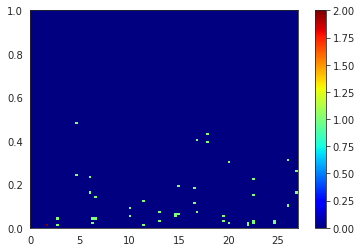

In [ ]:
datax = []
for x, y in zip(BackgroundCut3[' Daughter1 Transverse Momentum (GeV/c)'], BackgroundCut3[' Daughter2 Transverse Momentum (GeV/c)']):
    datax.append(x)
    datax.append(y)

datay = []
for z in BackgroundCut3[" Impact Parameter (cm)"]:
    datay.append(z)
    datay.append(z)


    
plt.hist2d(datay, datax, bins=100, cmap=plt.cm.jet, range = [[0,27],[0,1]])
plt.colorbar()


cenas


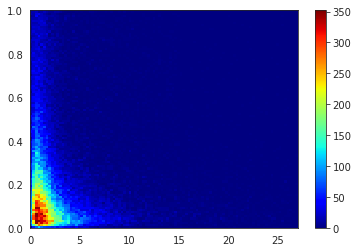

In [ ]:
datax = []
for x,y in zip(SignalCut3[' Daughter1 Transverse Momentum (GeV/c)'], SignalCut3[' Daughter2 Transverse Momentum (GeV/c)']):
    datax.append(x)
    datax.append(y)
    
datay = []
for z in SignalCut3[" Impact Parameter (cm)"]:
    datay.append(z)
    datay.append(z)

print("cenas")
    
plt.hist2d(datay, datax, bins=100, cmap=plt.cm.jet, range = [[0,27],[0,1]])
plt.colorbar()

In [ ]:
Imp_vs_TM_low_cut = [12.,0.25]
Imp_vs_TM_high_cut = [16.,1.45]

drop_entries = []
for mom1,impact,entry in zip(BackgroundCut2['Mother Total Momentum (GeV/c)'], BackgroundCut2[' Impact Parameter (cm)'], BackgroundCut2.index):
    if mom1 > 40:
            print(" Impact Parameter -> " + str(impact) + "; D1 Momentum -> " + str(mom1))
    
    
Cutty = BackgroundCut1.drop(drop_entries)
print(len(Cutty))

drop_entries = []
for mom1,mom2,impact,entry in zip(SignalCut1[' Daughter1 Total Momentum (GeV/c)'], SignalCut1[' Daughter2 Total Momentum (GeV/c)'], SignalCut1[' Impact Parameter (cm)'], SignalCut1.index):
    if impact > cuts[1]*(mom1 - cuts[0])**2 + cuts[2] or impact > cuts[1]*(mom2 - cuts[0])**2 + cuts[2]:
        drop_entries.append(entry)
            #print(" Impact Parameter -> " + str(impact) + "; D1 Momentum -> " + str(mom1) + "; D2 Momentum -> " + str(mom2))
            
Cutty = SignalCut1.drop(drop_entries)
print(len(Cutty)/len(Signal))

 Impact Parameter -> 23.7002696339; D1 Momentum -> 51.197622179899994
 Impact Parameter -> 25.6630715611; D1 Momentum -> 47.290884490299995
 Impact Parameter -> 14.839721873699999; D1 Momentum -> 66.3417144507
120
0.9142625315542734
